In [2]:
import pyvisa, time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
from IPython.display import display, clear_output

In [3]:
class INST_8562E:
    
    def __init__(self, Addr):
        self.ADDR = Addr
        self.visa_rm = pyvisa.ResourceManager()
        self.inst = self.visa_rm.open_resource('GPIB0::'+str(self.ADDR)+'::INSTR', write_termination='\n', read_termination='\n')
        self.inst.control_ren(1)
        
        self.start_freq = 0.0
        self.stop_freq = 0.0

    def identify(self):
        response=self.inst.query("ID?")
        print(response)
        
        return response
    
    def getSettings(self):
        self.start_freq = float(self.inst.query_ascii_values("FA?")[0])
        self.stop_freq = float(self.inst.query_ascii_values("FB?")[0])
        print(self.start_freq)
        print(self.stop_freq)
        print(self.inst.query("RL?"))
        print(self.inst.query("RB?"))
        print(self.inst.query("VB?"))
        print(self.inst.query("ST?"))
        print(self.inst.query("LG?"))
        print(self.inst.query("AUNITS?"))
        
    def setStartFreqnecy(self, start_freq):
        self.start_freq = start_freq
        self.inst.write("FA "+str(start_freq))
                
    def setStopFreqnecy(self, stop_freq):
        self.stop_freq = stop_freq
        self.inst.write("FB "+str(stop_freq))
        
    def getTrace(self):
        dat = self.inst.query_ascii_values("TDF P;TRA?")
        return dat

In [8]:
inst = INST_8562E(18)
inst.identify()

#inst.getSettings()

HP8562E


'HP8562E'

In [244]:
freqs = []
ampl_dbuv = []

span = 500e3

for stop_freq in np.arange(span,15e6+span,span):
    inst.setStartFreqnecy(stop_freq-span+1e3)
    inst.setStopFreqnecy(stop_freq)
    inst.inst.write('CLRW TRA') # clear A
    inst.inst.write('MXMH TRA') # max hold A
    time.sleep(5)
    dat = inst.getTrace()
    freqs += (np.linspace(inst.start_freq, inst.stop_freq, len(dat))).tolist()
    ampl_dbuv += (np.array(dat)).tolist()
    print(stop_freq)

500000.0
1000000.0
1500000.0
2000000.0
2500000.0
3000000.0
3500000.0
4000000.0
4500000.0
5000000.0
5500000.0
6000000.0
6500000.0
7000000.0
7500000.0
8000000.0
8500000.0
9000000.0
9500000.0
10000000.0
10500000.0
11000000.0
11500000.0
12000000.0
12500000.0
13000000.0
13500000.0
14000000.0
14500000.0
15000000.0


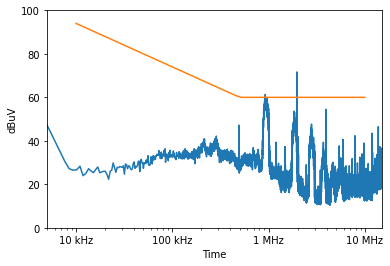

In [246]:
%matplotlib inline
frequency_envolope = np.logspace(4,7, 50)
amplitude_envolope = []
for f in frequency_envolope:
    if f < 500e3:
        amplitude_envolope.append(174.05-np.log10(f)*20.012)
    else:
        amplitude_envolope.append(60)

fig, ax = plt.subplots()
plt.semilogx(freqs,ampl_dbuv, frequency_envolope,amplitude_envolope)
formatter = EngFormatter(unit='Hz')
ax.xaxis.set_major_formatter(formatter)
plt.xlabel('Frequency')
plt.ylabel('dBuV')
plt.xlim([5e3, 15e6])
plt.ylim([0, 100])
plt.show()

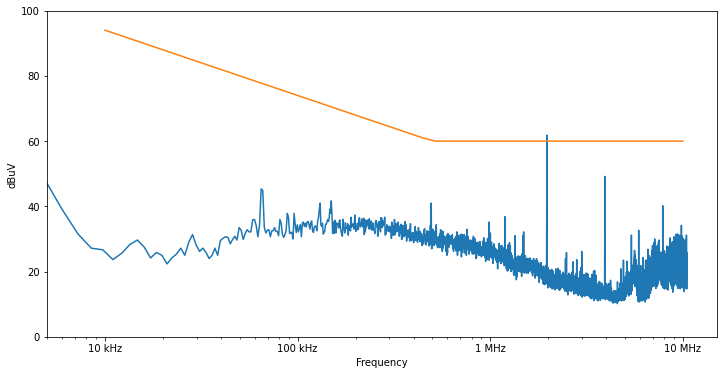

In [10]:
frequency_envolope = np.logspace(4,7, 50)
amplitude_envolope = []
for f in frequency_envolope:
    if f < 500e3:
        amplitude_envolope.append(174.05-np.log10(f)*20.012)
    else:
        amplitude_envolope.append(60)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1) 


freqs = []
ampl_dbuv = []

span = 750e3
stop = 10e6

for stop_freq in np.arange(span,stop+span,span):
    inst.setStartFreqnecy(stop_freq-span+1e3)
    inst.setStopFreqnecy(stop_freq)
    inst.inst.write('CLRW TRA') # clear A
    inst.inst.write('MXMH TRA') # max hold A
    time.sleep(5)
    dat = inst.getTrace()
    freqs += (np.linspace(inst.start_freq, inst.stop_freq, len(dat))).tolist()
    ampl_dbuv += (np.array(dat)).tolist()
    print(stop_freq)
    
    ax.cla()
    ax.semilogx(freqs,ampl_dbuv, frequency_envolope,amplitude_envolope)
    formatter = EngFormatter(unit='Hz')
    ax.xaxis.set_major_formatter(formatter)
    plt.xlabel('Frequency')
    plt.ylabel('dBuV')
    plt.xlim([5e3, 15e6])
    plt.ylim([0, 100])
    display(fig)
    clear_output(wait = True)
    #plt.show()

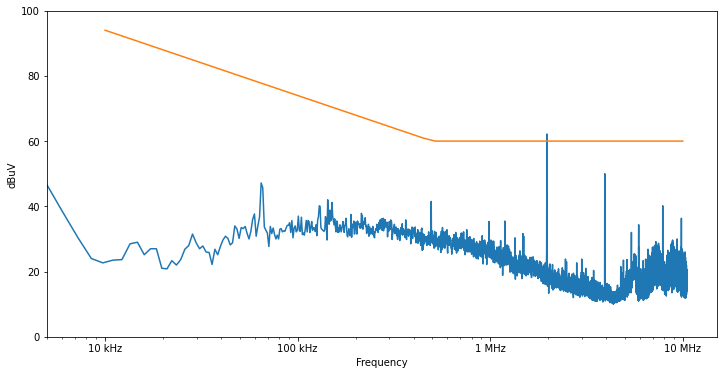

In [11]:
frequency_envolope = np.logspace(4,7, 50)
amplitude_envolope = []
for f in frequency_envolope:
    if f < 500e3:
        amplitude_envolope.append(174.05-np.log10(f)*20.012)
    else:
        amplitude_envolope.append(60)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1) 


freqs = []
ampl_dbuv = []

span = 750e3
stop = 10e6

for stop_freq in np.arange(span,stop+span,span):
    inst.setStartFreqnecy(stop_freq-span+1e3)
    inst.setStopFreqnecy(stop_freq)
    inst.inst.write('CLRW TRA') # clear A
    inst.inst.write('MXMH TRA') # max hold A
    time.sleep(5)
    dat = inst.getTrace()
    freqs += (np.linspace(inst.start_freq, inst.stop_freq, len(dat))).tolist()
    ampl_dbuv += (np.array(dat)).tolist()
    print(stop_freq)
    
    ax.cla()
    ax.semilogx(freqs,ampl_dbuv, frequency_envolope,amplitude_envolope)
    formatter = EngFormatter(unit='Hz')
    ax.xaxis.set_major_formatter(formatter)
    plt.xlabel('Frequency')
    plt.ylabel('dBuV')
    plt.xlim([5e3, 15e6])
    plt.ylim([0, 100])
    display(fig)
    clear_output(wait = True)
    #plt.show()

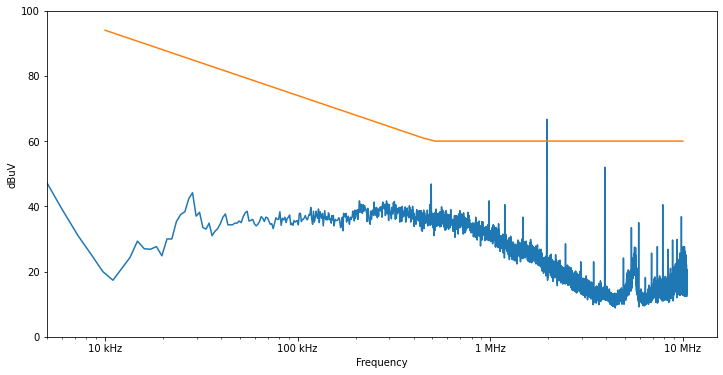

In [12]:
frequency_envolope = np.logspace(4,7, 50)
amplitude_envolope = []
for f in frequency_envolope:
    if f < 500e3:
        amplitude_envolope.append(174.05-np.log10(f)*20.012)
    else:
        amplitude_envolope.append(60)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1) 


freqs = []
ampl_dbuv = []

span = 750e3
stop = 10e6

for stop_freq in np.arange(span,stop+span,span):
    inst.setStartFreqnecy(stop_freq-span+1e3)
    inst.setStopFreqnecy(stop_freq)
    inst.inst.write('CLRW TRA') # clear A
    inst.inst.write('MXMH TRA') # max hold A
    time.sleep(5)
    dat = inst.getTrace()
    freqs += (np.linspace(inst.start_freq, inst.stop_freq, len(dat))).tolist()
    ampl_dbuv += (np.array(dat)).tolist()
    print(stop_freq)
    
    ax.cla()
    ax.semilogx(freqs,ampl_dbuv, frequency_envolope,amplitude_envolope)
    formatter = EngFormatter(unit='Hz')
    ax.xaxis.set_major_formatter(formatter)
    plt.xlabel('Frequency')
    plt.ylabel('dBuV')
    plt.xlim([5e3, 15e6])
    plt.ylim([0, 100])
    display(fig)
    clear_output(wait = True)
    #plt.show()

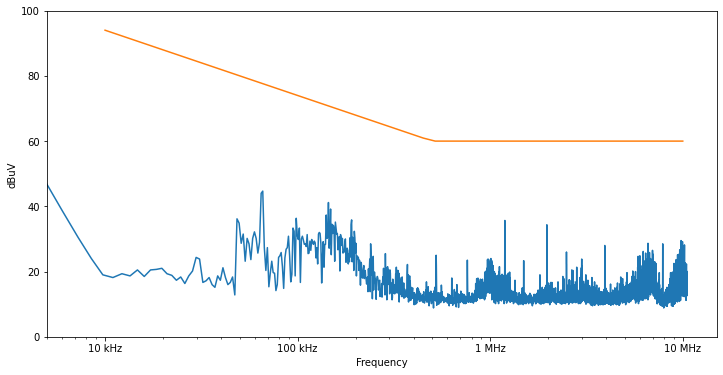

In [13]:
frequency_envolope = np.logspace(4,7, 50)
amplitude_envolope = []
for f in frequency_envolope:
    if f < 500e3:
        amplitude_envolope.append(174.05-np.log10(f)*20.012)
    else:
        amplitude_envolope.append(60)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1, 1, 1) 


freqs = []
ampl_dbuv = []

span = 750e3
stop = 10e6

for stop_freq in np.arange(span,stop+span,span):
    inst.setStartFreqnecy(stop_freq-span+1e3)
    inst.setStopFreqnecy(stop_freq)
    inst.inst.write('CLRW TRA') # clear A
    inst.inst.write('MXMH TRA') # max hold A
    time.sleep(5)
    dat = inst.getTrace()
    freqs += (np.linspace(inst.start_freq, inst.stop_freq, len(dat))).tolist()
    ampl_dbuv += (np.array(dat)).tolist()
    print(stop_freq)
    
    ax.cla()
    ax.semilogx(freqs,ampl_dbuv, frequency_envolope,amplitude_envolope)
    formatter = EngFormatter(unit='Hz')
    ax.xaxis.set_major_formatter(formatter)
    plt.xlabel('Frequency')
    plt.ylabel('dBuV')
    plt.xlim([5e3, 15e6])
    plt.ylim([0, 100])
    display(fig)
    clear_output(wait = True)
    #plt.show()